# **Pred2Town - Version 1.1 - Git**

This thesis, entitled "Homicide Prediction: The Impact of Imbalance Correction on Neural Network Performance", is a derived and extended version of the research "Prediction of Homicides in Urban Centers: A Machine Learning Approach", originally presented at IntelliSys 2021. The original work and source code are available at: https://github.com/josesousaribeiro/Pred2Town.

This updated version explores additional methodologies, particularly focusing on the impact of data imbalance correction techniques on neural network performance.

# **Analyzes**

## - Libs:

In [438]:
!pip install shap
!pip install eli5
!pip install lime
!pip install venn
!pip install scikit_posthocs
!pip install catboost



from scipy.stats import friedmanchisquare
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from folium.features import DivIcon

from decimal import Decimal 


from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from matplotlib.pyplot import subplots
from venn import venn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm

import seaborn as sns
import matplotlib.pyplot as plt
import shap
import eli5
import lime 
import lime.lime_tabular 
import pandas as pd
import csv
import io
import numpy as np
import seaborn as sns; sns.set()
import scikit_posthocs as sp
import pickle
import pandas as pd
import folium

import math
import matplotlib.pyplot as plt

import lightgbm as lgb
import catboost as cb






[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

## Global params to execution:

In [440]:
import pandas as pd

name_dataset = 'dataset_pred2town_bel.csv'
name_target_class = 'Class'

dt = {'info_gain_ent':[],
        'feat_imp_oob':[],
        'shap_rf':[],
        'shap_xgb':[],
        'shap_gb':[],
        'shap_dt':[],
        'eli5_rf':[],
        'eli5_xgb':[],
        'eli5_gb':[],
        'eli5_dt':[]}

df_Pred2Town_feature_rank = pd.DataFrame(dt)


# If false, upload the templates to the google colab path in order to locate each model to be reused.
# If true, grid search will be performed and new best models will be located automatically.
run_grid_search_cb = False
run_grid_search_lgbm = False
run_grid_search_rf = False
run_grid_search_xgb = False
run_grid_search_gb = False
run_grid_search_lr = False
run_grid_search_dt = False
run_grid_search_knn = False
run_grid_search_nb = False
run_grid_search_nn = False
run_grid_search_svm = False


cv_grid_search = 7 
crossvalidation = 7



## - Import dataset: dataset_pred2town_bel.csv


In [441]:
import pandas as pd


file_path = "dataset_pred2town_bel.csv" 
df = pd.read_csv(file_path, encoding="UTF-8", sep=";")


In [442]:
df

,mes_num_crb,quant_lesao_corporal_crb,quant_ameaca_crb,quant_roubo_crb,quant_injuria_crb,quant_furto_crb,quant_lesao_no_transito_crb,quant_dano_no_transito_crb,quant_difamacao_crb,quant_homicidio_crb,...,quant_receptacao_crb,quant_estupro_crb,quant_desaparecimento_de_pessoa_crb,quant_tentativa_de_homicidio_crb,quant_poluicao_sonora_crb,quant_outras_fraudes_crb,quant_desobediencia_crb,quant_desacato_crb,quant_perturbacoes_da_tranquilidade_crb,Class
0,1.0,0.000000,0.048193,0.002433,0.00000,0.020619,0.000000,0.000000,0.000000,0.071429,...,0.166667,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0
1,1.0,0.081633,0.084337,0.124088,0.03125,0.036082,0.233333,0.000000,0.000000,0.071429,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,1
2,1.0,0.000000,0.132530,0.063260,0.03125,0.018041,0.066667,0.027027,0.000000,0.000000,...,0.000000,0.0,0.2,0.0,0.000000,0.0,0.166667,0.0,0.125,1
3,1.0,0.183673,0.168675,0.141119,0.06250,0.126289,0.100000,0.027027,0.000000,0.000000,...,0.000000,0.0,0.4,0.0,0.000000,0.0,0.166667,0.4,0.125,0
4,1.0,0.040816,0.012048,0.017032,0.00000,0.038660,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.2,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,12.0,0.306122,0.289157,0.141119,0.15625,0.118557,0.100000,0.060811,0.166667,0.071429,...,0.000000,0.0,0.2,0.2,0.000000,0.0,0.000000,0.0,0.000,0
2000,12.0,0.183673,0.277108,0.192214,0.28125,0.381443,0.366667,0.506757,0.222222,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.000,0
2001,12.0,0.040816,0.012048,0.043796,0.00000,0.015464,0.000000,0.047297,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0
2002,12.0,0.040816,0.060241,0.075426,0.06250,0.090206,0.066667,0.243243,0.166667,0.071429,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0



## - Split de Train/Test

In [443]:
import numpy as np

np.random.seed(0)
# Set target value and others features.
y_feature_name = name_target_class

Y = (df[y_feature_name].astype(int))

x_features_names = list(df.head(0))
x_features_names.remove(name_target_class)
X =  df[x_features_names]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) # 70% training and 30% testing




In [445]:


# Save files locally
X_train.to_csv("X_train.csv", index=False)  
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Files saved to your current working directory!")


Files saved to your current working directory!


### Class stratification

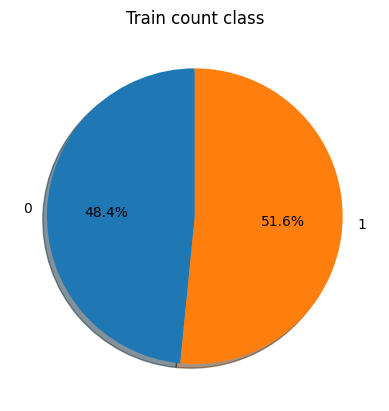

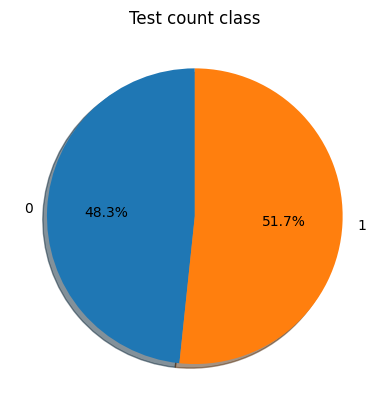

In [446]:
import matplotlib.pyplot as plt

title = 'Train count class'
labels = [0,1]
sizesTrain = [y_train.to_list().count(0), y_train.to_list().count(1)]
fig1, ax1 = plt.subplots()
ax1.pie(sizesTrain, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(title)
plt.show()

title = 'Test count class'
labels = [0,1]
sizesTest = [y_test.to_list().count(0), y_test.to_list().count(1)]
fig1, ax1 = plt.subplots()
ax1.pie(sizesTest, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(title)
plt.show()

In [203]:
print(df[y_feature_name].to_list().count(0))
print(df[y_feature_name].to_list().count(1))

970
1034


## - Train, test and algorithm analysis

### Random Forest - Create a GridSearch to identify the best classify

In [389]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pickle

filename = 'best_model_rf.sav'
run_grid_search_rf = True
if run_grid_search_rf == True:
  # Create the parameter grid based on the results of random search 
  # parameters in https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  param_grid = {
    'max_depth': [1,6,12],  # Test only one value for max_depth
    'bootstrap': [True],  # Test only True for bootstrap
    'n_estimators': [10,100,200],  # Test with only 100 trees
    'min_samples_leaf': [1, 10, 20, 40],
    'ccp_alpha': [0.0,0.4],  # Test with no pruning
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
  }


  # Create a based model
  model_rf = RandomForestClassifier()
  # Instantiate the grid search model
  #https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py
  grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  
  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  
  grid_search.best_params_

  model_rf = grid_search.best_estimator_
  #save
  pickle.dump(model_rf, open(filename, 'wb'))
  
else: 
  #load
  model_rf = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_rf)
y_pred_rf = model_rf.predict(X_test)


Fitting 7 folds for each of 288 candidates, totalling 2016 fits
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, ccp_alpha=0.0, criterion=gini, max_depth=1,

RF - Accuracy, precision and Recall

In [390]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = y_pred_rf
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)],
    'F1 score': [f1_score(y_test, y_pred)],
     'roc_auc':[roc_auc_score(y_test, y_pred)]
    }
dataframe_analisys = pd.DataFrame(data=d)

dataframe_analisys

,Accuracy,Precision,Recall,F1 score,roc_auc
0,0.747508,0.757282,0.752412,0.754839,0.74734


RF - Confusio matrix

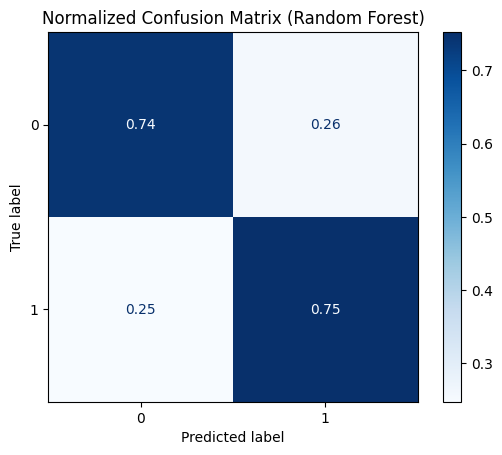

In [391]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model_rf,
    X_test,
    y_test,
    display_labels=['0', '1'],
    cmap=plt.cm.Blues,
    normalize='true'
)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


RF - Statistical analysis

/var/folders/ct/z0hnrbgs2k3ckyk5nyw8n03w0000gn/T/ipykernel_1543/2797378004.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


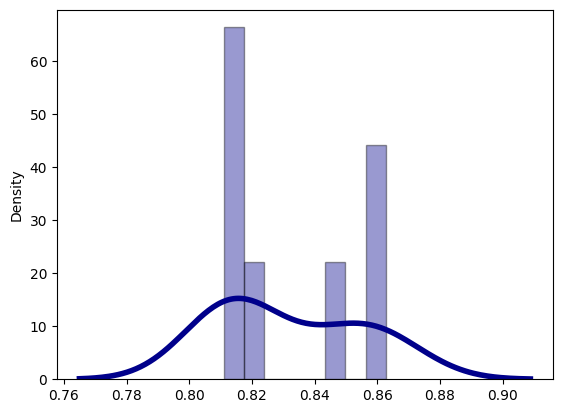

In [392]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

hit_rates = cross_val_score(model_rf, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_rf = hit_rates

### Neural Network

In [393]:
import pickle
filename = 'best_model_nn.sav'

if run_grid_search_nn == True:
  # Create the parameter grid
  #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

  param_grid = {
                'learning_rate':['constant', 'invscaling', 'adaptive'],
                'solver':['lbfgs', 'sgd', 'adam'],
                'activation':['identity', 'logistic', 'tanh', 'relu'],
                'max_iter': [200,300,400],
                'alpha': [0.0001,0.0003],
                'hidden_layer_sizes':[1,2,3,4,5]
                }

  # Create a based model
  model_nn = MLPClassifier()

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_nn, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_nn = grid_search.best_estimator_
  #save
  pickle.dump(model_nn, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_nn = pickle.load(open(filename, 'rb'))
  
print('Parameters of best model:')
print(model_nn)
y_pred_nn = model_nn.predict(X_test)



Parameters of best model:
MLPClassifier(activation='tanh', alpha=0.0003, hidden_layer_sizes=3,
              learning_rate='invscaling', max_iter=300)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.2.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 0.22.2.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWar

NN - Accuracy, precision and recall

In [394]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = y_pred_nn
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)],
    'F1 score': [f1_score(y_test, y_pred)],
     'roc_auc':[roc_auc_score(y_test, y_pred)]

    }
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall,F1 score,roc_auc
0,0.742525,0.786765,0.688103,0.734134,0.744395


NN - Confusion matrix

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


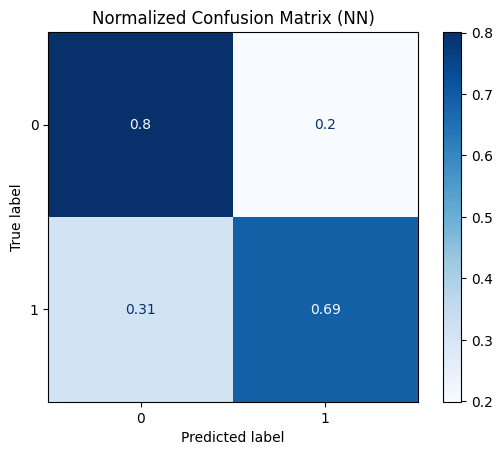

In [395]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model_nn,
    X_test,
    y_test,
    display_labels=['0', '1'],
    cmap=plt.cm.Blues,
    normalize='true'
)
plt.title("Normalized Confusion Matrix (NN)")
plt.show()


NN - Statistical analysis

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

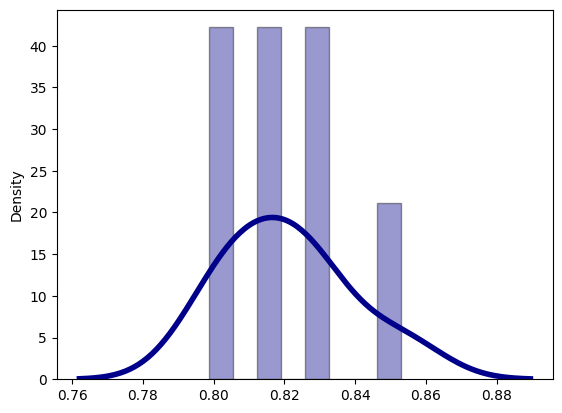

In [396]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import seaborn as sns


# Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=crossvalidation)

hit_rates = cross_val_score(model_nn, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_nn = hit_rates

In [134]:
pip install pytorch-tabnet



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [451]:

search.fit(X_train, y_train)

# Grab the best pipeline
best_xgb = search.best_estimator_

# Persist it
with open('best_xgb_next.sav', 'wb') as f:
    pickle.dump(best_xgb, f)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [03:30:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [03:30:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [03:30:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [03:30:25] WARN

In [452]:
import os
import pickle
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# 1) Build a base NN pipeline 
base_pipe_nn = ImbPipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, svd_solver='full')),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    ))
])

# 2) Define the hyperparameter search space
param_dist_nn = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (100,50), (50,25,10)],
    'mlp__solver':             ['adam', 'lbfgs'],
    'mlp__alpha':              [1e-4, 1e-3, 1e-2],
    'mlp__learning_rate':      ['constant', 'adaptive'],
    'mlp__learning_rate_init': [1e-3, 1e-2, 1e-4],
    'mlp__max_iter':           [500, 1000],
    'mlp__tol':                [1e-4, 1e-5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3) Set up and run the RandomizedSearchCV for NN
search_nn = RandomizedSearchCV(
    base_pipe_nn,
    param_distributions=param_dist_nn,
    n_iter=20,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search_nn.fit(X_train, y_train)

# 4) Save the best NN pipeline
best_nn = search_nn.best_estimator_
with open('best_nn_next.sav', 'wb') as f:
    pickle.dump(best_nn, f)

print("Best NN params:", search_nn.best_params_)
print(f"NN CV best ROC-AUC: {search_nn.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

Best NN params: {'mlp__tol': 1e-05, 'mlp__solver': 'adam', 'mlp__max_iter': 500, 'mlp__learning_rate_init': 0.001, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (100,), 'mlp__alpha': 0.001}
NN CV best ROC-AUC: 0.8060


In [485]:
import os
import pickle
import numpy as np
import pandas as pd

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load individual models
with open('best_xgb_next.sav', 'rb') as f:
    xgb_pipe = pickle.load(f)

with open('best_nn_next.sav', 'rb') as f:
    nn_pipe = pickle.load(f)

# File path for the stacked model
stack_model_path = 'best_model_next.sav'

# Load or train the stacked model
if os.path.exists(stack_model_path):
    with open(stack_model_path, 'rb') as f:
        stack = pickle.load(f)
    print("Loaded stacked model from disk.")
else:
    # Create and train the stack
    stack = StackingClassifier(
        estimators=[
            ('xgb', xgb_pipe),
            ('nn', nn_pipe)
        ],
        final_estimator=LogisticRegression(
            class_weight='balanced',
            solver='liblinear',
            random_state=42
        ),
        cv=5,
        stack_method='predict_proba',
        passthrough=True,
        n_jobs=-1
    )
    stack.fit(X_train, y_train)

    # Save it
    with open(stack_model_path, 'wb') as f:
        pickle.dump(stack, f)
    print("Trained and saved stacked model.")

# Evaluate
y_proba = stack.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}

df_results = pd.DataFrame([metrics])
print(df_results)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [03:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[03:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[03:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[03:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[03:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[03:51:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



Trained and saved stacked model.
   Accuracy  Precision    Recall  F1 score   ROC AUC
0  0.718204   0.732673  0.714976  0.723716  0.806689


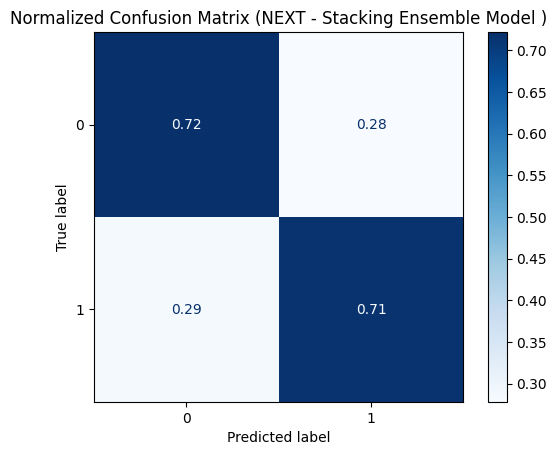

In [486]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(
    stack,
    X_test,
    y_test,
    display_labels=['0', '1'],
    cmap=plt.cm.Blues,
    normalize='true'
)
plt.title("Normalized Confusion Matrix (NEXT - Stacking Ensemble Model )")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [03:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[03:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[03:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[03:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[03:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[03:51:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packa

[0.80546648 0.88127958 0.85631394 0.82264468 0.84394564 0.82722553
 0.82047364]


/var/folders/ct/z0hnrbgs2k3ckyk5nyw8n03w0000gn/T/ipykernel_1543/2454788867.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hit_rates, hist=True, kde=True,


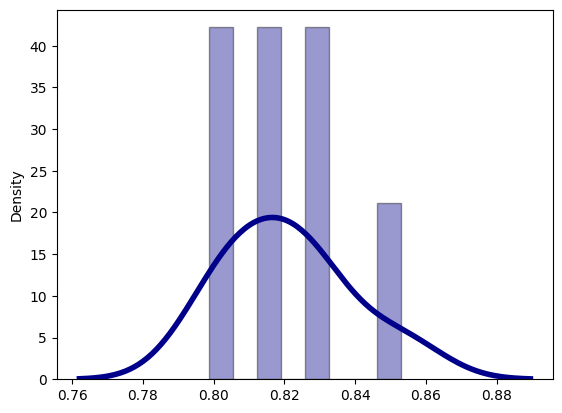

In [487]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import seaborn as sns



hit_rates_next = cross_val_score(stack, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
print(hit_rates_next)

In [488]:
print('rf',hit_rates_rf)
print ('nn',hit_rates_nn)
print ('next', hit_rates_next)

rf [0.85755353 0.81106265 0.81783605 0.81513362 0.81283155 0.8627765
 0.84586128]
nn [0.82751784 0.81899286 0.79871885 0.8123311  0.80542488 0.85286758
 0.82984686]
next [0.80546648 0.88127958 0.85631394 0.82264468 0.84394564 0.82722553
 0.82047364]


## - Models comparation;


In [475]:
from sklearn.model_selection import train_test_split

# Split data first, then scale
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Scale the data after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [479]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize dictionaries to store evaluation metrics
metrics_rf = {}
metrics_nn = {}
metrics_next = {}

# Helper function to calculate evaluation metrics
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Track time taken for training
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Track time for inference
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time
    
    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Store the metrics
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'training_time': training_time,
        'inference_time': inference_time
    }
    
    # Cross-validation ROC AUC scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    metrics['cross_val_roc_auc'] = cv_scores
    
    # Save to the corresponding dictionary
    if model_name == 'Random Forest':
        metrics_rf.update(metrics)
    elif model_name == 'Neural Network':
        metrics_nn.update(metrics)
    elif model_name == 'Next':
        metrics_next.update(metrics)

# Evaluate Random Forest
evaluate_model(model_rf, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest')

# Evaluate Neural Network
evaluate_model(model_nn, X_train_scaled, y_train, X_test_scaled, y_test, 'Neural Network')

# Evaluate New Neural Network
evaluate_model(stack, X_train_scaled, y_train, X_test_scaled, y_test, 'Next')

# Print the metrics for all models
print("Random Forest Metrics:")
print(metrics_rf)

print("\nNeural Network Metrics:")
print(metrics_nn)

print("\nNext Metrics:")
print(metrics_next)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Random Forest Metrics:
{'accuracy': 0.7306733167082294, 'precision': 0.726027397260274, 'recall': 0.7681159420289855, 'f1_score': 0.7464788732394366, 'roc_auc': np.float64(0.8148065142686387), 'training_time': 0.330615758895874, 'inference_time': 0.00943613052368164, 'cross_val_roc_auc': array([0.81196581, 0.78146133, 0.88581422, 0.81438905, 0.85356794])}

Neural Network Metrics:
{'accuracy': 0.7306733167082294, 'precision': 0.7414634146341463, 'recall': 0.7342995169082126, 'f1_score': 0.7378640776699029, 'roc_auc': np.float64(0.798769859056726), 'training_time': 0.24311184883117676, 'inference_time': 0.00036525726318359375, 'cross_val_roc_auc': array([0.80128205, 0.7982122 , 0.86937427, 0.80246334, 0.8343695 ])}

Next Metrics:
{'accuracy': 0.7231920199501247, 'precision': 0.7448979591836735, 'recall': 0.7053140096618358, 'f1_score': 0.7245657568238213, 'roc_auc': np.float64(0.8026545146670649), 'training_time': 0.3511061668395996, 'inference_time': 0.002073049545288086, 'cross_val_roc

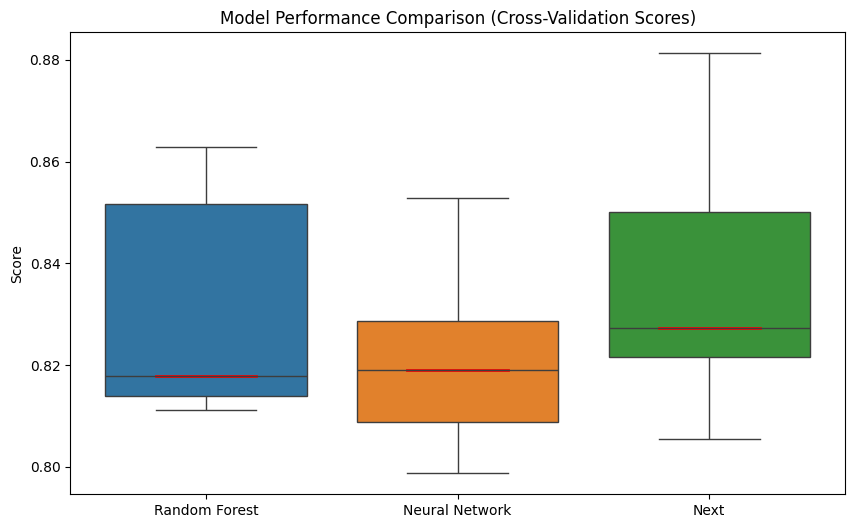

Random Forest Scores: [0.85755353 0.81106265 0.81783605 0.81513362 0.81283155 0.8627765
 0.84586128]
Neural Network Scores: [0.82751784 0.81899286 0.79871885 0.8123311  0.80542488 0.85286758
 0.82984686]
New Neural Network Scores: [0.80546648 0.88127958 0.85631394 0.82264468 0.84394564 0.82722553
 0.82047364]


In [468]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Combine data into a list for plotting
scores = [hit_rates_rf, hit_rates_nn, hit_rates_next]
labels = ['Random Forest', 'Neural Network', 'Next']

# Compute medians
medians = [np.median(model_scores) for model_scores in scores]

# Create boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=scores, orient="v")

# Add red horizontal lines for medians
for i, median in enumerate(medians):
    plt.plot([i - 0.2, i + 0.2], [median, median], color='red', linewidth=2)

plt.xticks(np.arange(3), labels=labels)
plt.title("Model Performance Comparison (Cross-Validation Scores)")
plt.ylabel("Score")
plt.show()

# Printing the actual cross-validation scores for each model
print('Random Forest Scores:', hit_rates_rf)
print('Neural Network Scores:', hit_rates_nn)
print('New Neural Network Scores:', hit_rates_next)


Density


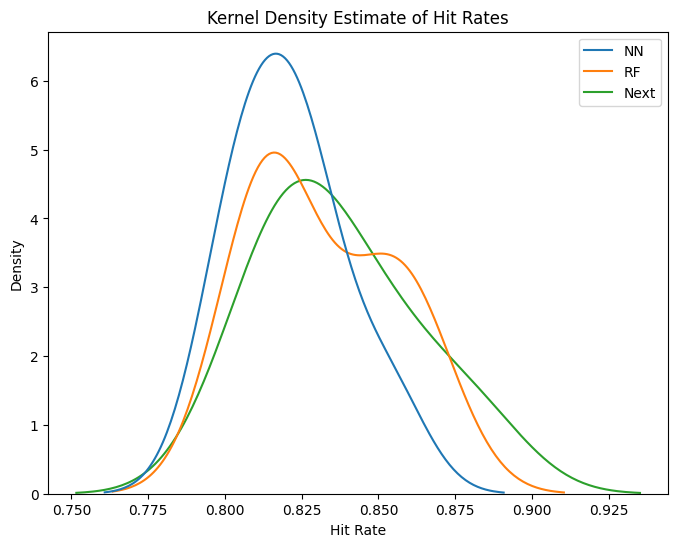

In [470]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp


print('Density')

# Prepare DataFrame
dt_tmp = {
    'NN': hit_rates_nn,
    'RF': hit_rates_rf,
    'Next': hit_rates_next
}
dt_tmp = pd.DataFrame(dt_tmp)

# KDE Plot
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=dt_tmp, legend=True, bw_method=0.7)
plt.title("Kernel Density Estimate of Hit Rates")
plt.xlabel("Hit Rate")
plt.ylabel("Density")
plt.show()





## - Information Gain (Global);

Funções utilizadas

In [189]:



def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    The only parameter of this function is the target_col parameter which specifies the target column
    """
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


################### 
    
###################


def InfoGain(data,split_attribute_name,target_name="class"):
    """
    Calculate the information gain of a dataset. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain



Ganho de Informação - Ranque de atributos

In [190]:
data = pd.read_csv("dataset_pred2town_bel.csv", delimiter=";")

# Renaming columns for consistency
column_translation = {
    "mes_num_crb": "month_number",
    "quant_lesao_corporal_crb": "physical_injury",
    "quant_ameaca_crb": "threats",
    "quant_roubo_crb": "robbery",
    "quant_injuria_crb": "injury",
    "quant_furto_crb": "theft",
    "quant_lesao_no_transito_crb": "traffic_injury",
    "quant_dano_no_transito_crb": "traffic_damage",
    "quant_difamacao_crb": "defamation",
    "quant_homicidio_crb": "homicide",
    "quant_abandono_do_lar_crb": "abandonment_of_home",
    "quant_conflitos_vicinais_crb": "neighborhood_conflicts",
    "quant_conflitos_conjugais_crb": "marital_conflicts",
    "quant_fuga_do_lar_crb": "escape_from_home",
    "quant_estupro_de_vulneravel_crb": "rape_of_vulnerable_person",
    "quant_outros_fatos_atipicos_crb": "other_atypical_facts",
    "quant_roubo_de_veiculo_crb": "vehicle_robbery",
    "quant_estelionato_crb": "fraud",
    "quant_dano_crb": "damage",
    "quant_dano_civil_crb": "civil_damage",
    "quant_calunia_crb": "slander",
    "quant_conflitos_familiares_crb": "family_conflicts",
    "quant_trafico_de_drogas_crb": "drug_trafficking",
    "quant_vias_de_fato_crb": "physical_assault",
    "quant_apropriacao_indebita_crb": "embezzlement",
    "quant_agressao_fisica_crb": "physical_assault",
    "quant_receptacao_crb": "receiving_stolen_goods",
    "quant_estupro_crb": "rape",
    "quant_desaparecimento_de_pessoa_crb": "missing_person",
    "quant_tentativa_de_homicidio_crb": "attempted_homicide",
    "quant_poluicao_sonora_crb": "noise_pollution",
    "quant_outras_fraudes_crb": "other_frauds",
    "quant_desobediencia_crb": "disobedience",
    "quant_desacato_crb": "contempt_of_authority",
    "quant_perturbacoes_da_tranquilidade_crb": "disturbance_of_the_peace",
    "Class": "class"
}

# Renaming columns
data = data.rename(columns=column_translation)


In [191]:
# Features and target
x_features_names = [col for col in data.columns if col != 'class']
y_feature_name = 'class'

# InfoGain calculation
def InfoGain(df, feature, target):
    return mutual_info_classif(df[[feature]], df[target], discrete_features=True)[0]

# Calculate and sort Information Gain
information_gain = pd.Series(
    [InfoGain(data, feature, y_feature_name) for feature in x_features_names],
    index=x_features_names
).sort_values(ascending=False)

# Plot top 20 attributes
att_count = 20
plt.figure(figsize=(5, 3.5))
sns.barplot(
    x=information_gain.iloc[:att_count],
    y=information_gain.index[:att_count],
    color=(0.1, 0.4, 0.7, 0.6)
)
plt.xlabel('Information Gain')
plt.ylabel('Features')
plt.title('Top Features by Information Gain')
plt.tight_layout()
plt.show()

NameError: name 'mutual_info_classif' is not defined

## - Attribute importance (Global);

In [188]:
# Extracting feature importance from the Random Forest model
feature_importance = pd.Series(model_rf.feature_importances_, index=x_features_names).sort_values(ascending=False)

# Add feature ranking to a DataFrame (assuming df_Pred2Town_feature_rank exists)
df_Pred2Town_feature_rank['feature_importance_rf'] = feature_importance.index[:]

# Plot top features by importance
plt.figure(figsize=(5, 3.5))
sns.barplot(
    x=feature_importance[0:att_count],
    y=feature_importance.index[0:att_count],
    color=(0.1, 0.4, 0.7, 0.6)
)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Features by Random Forest Importance')
plt.tight_layout()
plt.show()



NameError: name 'att_count' is not defined

<Figure size 500x350 with 0 Axes>